In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
%cd /content/drive/MyDrive/TKPTTT/DNA-Decoder-Simulator/
!ls

/content/drive/MyDrive/TKPTTT/DNA-Decoder-Simulator
'Bản sao của make_data.ipynb'   bfs_abkmer.png	       main.py
'Bản sao của visualize.ipynb'   bfs_ckmer_1_b54.png    make_data.ipynb
 beam_185.png		        bfs_cprune_1_b10.png   Models
 beam_abk.png		        data		       README.md
 beam.png		       'download (1).png'      requirements.txt
 bfs_17.png		       'download (2).png'      test.ipynb
 bfs_4_ckmer_30best.png        'download (3).png'      test_oop.ipynb
 bfs_4_coprune_3best.png       'download (4).png'      utils
 bfs4_cprune.png	       'download (5).png'      visualize.ipynb
 bfs4_kmer_c.png	        LICENSE


In [ ]:
from Models.Decoder import Decoder
from Models.Encoder import Encoder
from utils.converter import str2ncs, ncs2str
from Models.Decoder.Decoder import DFS, BFS, Beam
import time
import numpy as np
import matplotlib.pyplot as plt


In [38]:
# 1k1050 10k450 1k0350 1k03100 1k01100 20010100 2000150 2000450 2001050 20004200
en = Encoder()
origins, reads = en.load_data(path='data/20004200')
origins.shape, reads.shape

((200,), (200, 200))

## BFS

### Choice kmer size

In [42]:
init_kmer_size = 24
prune = 4

bfs_kmer_sizes = []
bfs_accuracies = []
bfs_times = []
for kmer_size in range(init_kmer_size, 60, 2):
    # kmer_size = 50
    total_time = 0
    bfs_results = []
    print(f'kmer_size: {kmer_size} prune: {prune}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(BFS(min_weight=prune, db=100000))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        bfs_results.append(rs[0])
        if i%20 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(bfs_results).sum()*100/(i+1), 4)}%')
    bfs_kmer_sizes.append(kmer_size)
    bfs_accuracies.append(round(np.array(bfs_results).sum()*100/origins.shape[0], 4))
    bfs_times.append(total_time*1000)

kmer_size: 24 prune: 4
0: 0.007s 0.007s 100.0%
20: 0.008s 0.191s 80.9524%
40: 0.011s 0.364s 85.3659%
60: 0.009s 0.529s 90.1639%
80: 0.008s 0.705s 91.358%
100: 0.008s 0.92s 91.0891%
120: 0.009s 1.096s 91.7355%
140: 0.009s 1.3s 92.1986%
160: 0.008s 1.487s 93.1677%
180: 0.009s 1.673s 92.8177%
kmer_size: 26 prune: 4
0: 0.008s 0.008s 100.0%
20: 0.008s 0.184s 85.7143%
40: 0.015s 0.365s 90.2439%
60: 0.007s 0.531s 93.4426%
80: 0.008s 0.702s 93.8272%
100: 0.008s 0.911s 93.0693%
120: 0.008s 1.091s 92.562%
140: 0.01s 1.304s 92.9078%
160: 0.007s 1.478s 93.7888%
180: 0.008s 1.656s 93.3702%
kmer_size: 28 prune: 4
0: 0.007s 0.007s 100.0%
20: 0.008s 0.186s 85.7143%
40: 0.011s 0.361s 92.6829%
60: 0.008s 0.543s 95.082%
80: 0.007s 0.713s 95.0617%
100: 0.008s 0.899s 94.0594%
120: 0.009s 1.077s 93.3884%
140: 0.012s 1.282s 93.617%
160: 0.007s 1.462s 94.4099%
180: 0.009s 1.646s 93.9227%
kmer_size: 30 prune: 4
0: 0.008s 0.008s 100.0%
20: 0.009s 0.205s 90.4762%
40: 0.011s 0.389s 95.122%
60: 0.008s 0.57s 96.721

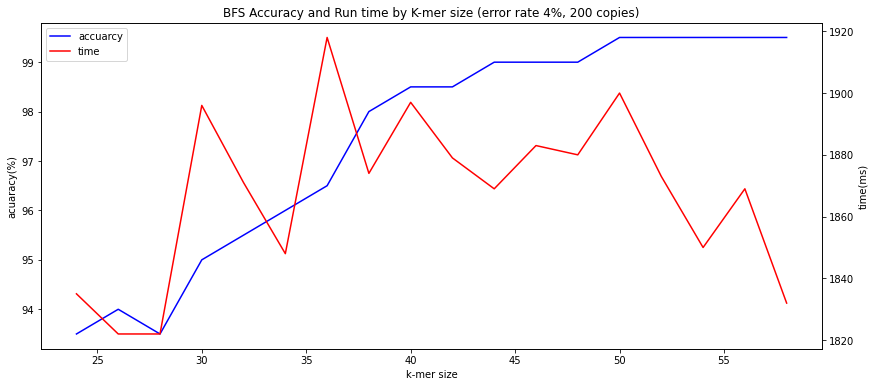

In [43]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(bfs_kmer_sizes, bfs_accuracies, color="b", label="accuarcy")
ax.set_xlabel("k-mer size")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(bfs_kmer_sizes, bfs_times, color="r", label="time")
ax2.set_ylabel("time(ms)")

plt.title('BFS Accuracy and Run time by K-mer size (error rate 4%, 200 copies)')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)
plt.show()

### Choice prune

In [ ]:
init_prune = 1
kmer_size = 50

bfs_prunes = []
bfs_accuracies = []
bfs_times = []

for prune in reversed(range(init_prune, 9)):
    total_time = 0
    bfs_results = []
    print(f'kmer_size: {kmer_size} prune: {prune}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(BFS(min_weight=prune, db=0))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        bfs_results.append(rs[0])
        if i%20 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(bfs_results).sum()*100/(i+1), 4)}%')
    bfs_prunes.append(prune)
    bfs_accuracies.append(round(np.array(bfs_results).sum()*100/origins.shape[0], 4))
    bfs_times.append(total_time*1000)

bfs_prunes.reverse()
bfs_accuracies.reverse()
bfs_times.reverse()

kmer_size: 50 prune: 8
0: 0.008s 0.008s 100.0%
20: 0.009s 0.218s 100.0%
40: 0.011s 0.406s 100.0%
60: 0.009s 0.596s 100.0%
80: 0.008s 0.795s 100.0%
100: 0.009s 0.983s 100.0%
120: 0.008s 1.168s 99.1736%
140: 0.017s 1.365s 99.2908%
160: 0.008s 1.546s 99.3789%
180: 0.008s 1.73s 99.4475%
kmer_size: 50 prune: 7
0: 0.008s 0.008s 100.0%
20: 0.008s 0.188s 100.0%
40: 0.013s 0.386s 100.0%
60: 0.008s 0.569s 100.0%
80: 0.009s 0.756s 100.0%
100: 0.009s 0.939s 100.0%
120: 0.009s 1.136s 99.1736%
140: 0.012s 1.339s 99.2908%
160: 0.008s 1.518s 99.3789%
180: 0.01s 1.711s 99.4475%
kmer_size: 50 prune: 6
0: 0.008s 0.008s 100.0%
20: 0.009s 0.199s 100.0%
40: 0.012s 0.384s 100.0%
60: 0.009s 0.564s 100.0%
80: 0.009s 0.747s 100.0%
100: 0.015s 0.936s 100.0%
120: 0.008s 1.126s 99.1736%
140: 0.011s 1.319s 99.2908%
160: 0.008s 1.504s 99.3789%
180: 0.01s 1.688s 99.4475%
kmer_size: 50 prune: 5
0: 0.009s 0.009s 100.0%
20: 0.009s 0.195s 100.0%
40: 0.012s 0.393s 100.0%
60: 0.009s 0.576s 100.0%
80: 0.01s 0.758s 100.0%
10

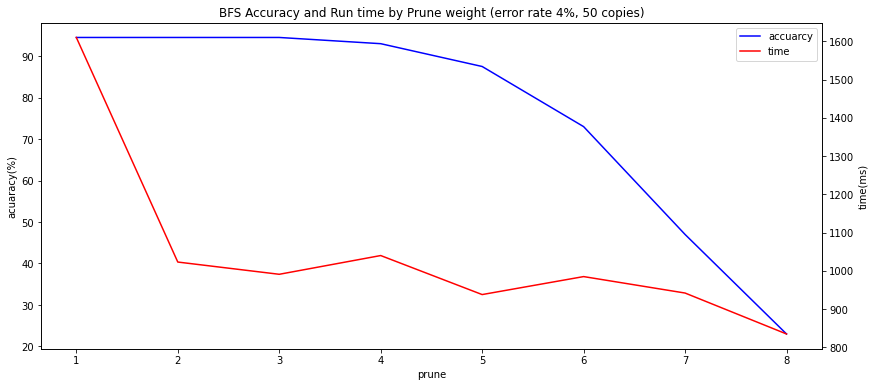

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(bfs_prunes, bfs_accuracies, color="b", label="accuarcy")
ax.set_xlabel("prune")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(bfs_prunes, bfs_times, color="r", label="time")
ax2.set_ylabel("time(ms)")

plt.title('BFS Accuracy and Run time by Prune weight (error rate 4%, 50 copies)')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)
plt.show()

## DFS

In [ ]:
init_kmer_size = 14
prune = 4

dfs_kmer_sizes = []
dfs_accuracies = []
dfs_times = []
for kmer_size in range(init_kmer_size, 60, 2):
    # kmer_size = 50
    total_time = 0
    dfs_results = []
    print(f'kmer_size: {kmer_size} prune: {prune}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(DFS(min_weight=prune))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        dfs_results.append(rs[0])
        if i%20 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(dfs_results).sum()*100/(i+1), 4)}%')
    dfs_kmer_sizes.append(kmer_size)
    dfs_accuracies.append(round(np.array(dfs_results).sum()*100/origins.shape[0], 4))
    dfs_times.append(total_time*1000)

kmer_size: 14 prune: 4
0: 0.007s 0.007s 100.0%
20: 0.012s 0.955s 80.9524%
40: 0.016s 1.153s 80.4878%
60: 0.008s 1.339s 81.9672%
80: 0.007s 3.402s 80.2469%
100: 0.007s 3.597s 79.2079%
120: 0.008s 3.835s 79.3388%
140: 0.007s 4.184s 79.4326%
160: 0.007s 4.382s 81.3665%
180: 0.007s 4.572s 82.3204%
kmer_size: 16 prune: 4
0: 0.008s 0.008s 100.0%
20: 0.009s 0.2s 80.9524%
40: 0.008s 0.37s 82.9268%
60: 0.009s 0.559s 85.2459%
80: 0.008s 0.733s 83.9506%
100: 0.008s 0.921s 84.1584%
120: 0.01s 1.11s 82.6446%
140: 0.007s 1.314s 82.2695%
160: 0.007s 1.496s 82.6087%
180: 0.008s 1.679s 83.4254%
kmer_size: 18 prune: 4
0: 0.008s 0.008s 100.0%
20: 0.01s 0.199s 71.4286%
40: 0.012s 0.374s 78.0488%
60: 0.008s 0.554s 85.2459%
80: 0.008s 0.719s 85.1852%
100: 0.008s 0.907s 86.1386%
120: 0.009s 1.074s 85.124%
140: 0.009s 1.255s 85.1064%
160: 0.007s 1.423s 83.8509%
180: 0.009s 1.6s 83.9779%
kmer_size: 20 prune: 4
0: 0.008s 0.008s 100.0%
20: 0.009s 0.178s 71.4286%
40: 0.015s 0.351s 68.2927%
60: 0.01s 0.522s 72.131

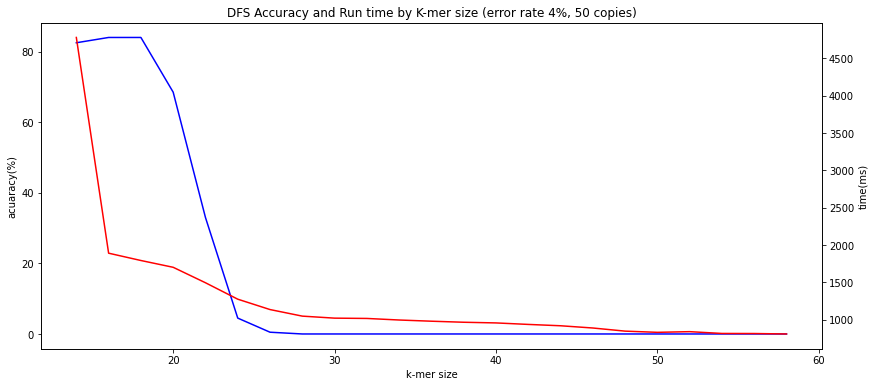

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(dfs_kmer_sizes, dfs_accuracies, color="b")
ax.set_xlabel("k-mer size")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(dfs_kmer_sizes, dfs_times, color="r")
ax2.set_ylabel("time(ms)")

plt.title('DFS Accuracy and Run time by K-mer size (error rate 4%, 50 copies)')
plt.show()

### Choice prune

In [ ]:
init_prune = 1
kmer_size = 32

dfs_prunes = []
dfs_accuracies = []
dfs_times = []

for prune in reversed(range(init_prune, 9)):
    total_time = 0
    dfs_results = []
    print(f'kmer_size: {kmer_size} prune: {prune}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(DFS(min_weight=prune))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        dfs_results.append(rs[0])
        if i%20 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(dfs_results).sum()*100/(i+1), 4)}%')
    dfs_prunes.append(prune)
    dfs_accuracies.append(round(np.array(dfs_results).sum()*100/origins.shape[0], 4))
    dfs_times.append(total_time*1000)

dfs_prunes.reverse()
dfs_accuracies.reverse()
dfs_times.reverse()

kmer_size: 32 prune: 8
0: 0.002s 0.002s 0.0%
20: 0.002s 0.074s 33.3333%
40: 0.007s 0.161s 31.7073%
60: 0.003s 0.236s 27.8689%
80: 0.005s 0.322s 30.8642%
100: 0.002s 0.392s 27.7228%
120: 0.004s 0.46s 26.4463%
140: 0.002s 0.538s 25.5319%
160: 0.002s 0.616s 24.2236%
180: 0.003s 0.677s 23.2044%
kmer_size: 32 prune: 7
0: 0.003s 0.003s 0.0%
20: 0.002s 0.085s 61.9048%
40: 0.005s 0.18s 60.9756%
60: 0.005s 0.269s 59.0164%
80: 0.004s 0.365s 61.7284%
100: 0.006s 0.463s 55.4455%
120: 0.005s 0.551s 52.8926%
140: 0.005s 0.644s 50.3546%
160: 0.005s 0.73s 49.0683%
180: 0.003s 0.819s 47.5138%
kmer_size: 32 prune: 6
0: 0.003s 0.003s 0.0%
20: 0.002s 0.094s 66.6667%
40: 0.005s 0.201s 73.1707%
60: 0.005s 0.299s 75.4098%
80: 0.004s 0.403s 79.0123%
100: 0.006s 0.498s 79.2079%
120: 0.005s 0.589s 77.686%
140: 0.004s 0.692s 76.5957%
160: 0.004s 0.806s 74.5342%
180: 0.003s 0.888s 72.3757%
kmer_size: 32 prune: 5
0: 0.002s 0.002s 0.0%
20: 0.002s 0.093s 76.1905%
40: 0.005s 0.197s 85.3659%
60: 0.005s 0.299s 90.1639%

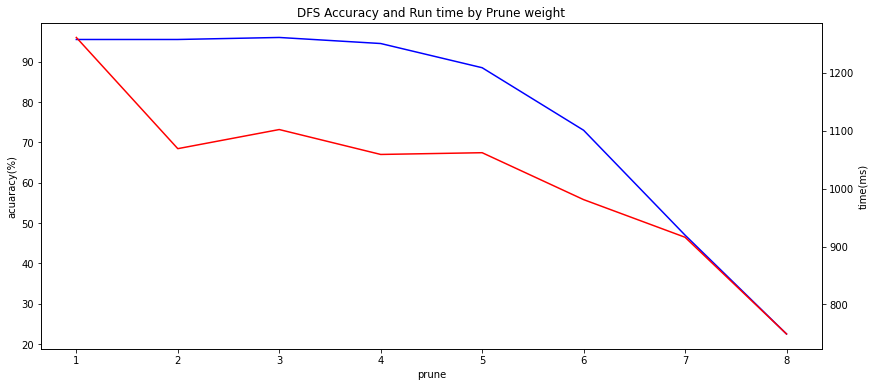

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(dfs_prunes, dfs_accuracies, color="b")
ax.set_xlabel("prune")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(dfs_prunes, dfs_times, color="r")
ax2.set_ylabel("time(ms)")

plt.title('DFS Accuracy and Run time by Prune weight')
plt.show()

### Compare DFS & BFS


In [ ]:
init_prune = 2
kmer_size = 17

dfs_prunes = []
dfs_accuracies = []
dfs_times = []

for prune in reversed(range(init_prune, 8)):
    total_time = 0
    bfs_results = []
    print(f'kmer_size: {kmer_size} prune: {prune}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(DFS(min_weight=prune))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        bfs_results.append(rs[0])
        if i%20 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(bfs_results).sum()*100/(i+1), 4)}%')
    dfs_prunes.append(prune)
    dfs_accuracies.append(round(np.array(bfs_results).sum()*100/origins.shape[0], 4))
    dfs_times.append(total_time*1000)

kmer_size: 17 prune: 7
0: 0.006s 0.006s 100.0%
20: 0.008s 0.16s 47.619%
40: 0.006s 0.294s 58.5366%
60: 0.006s 0.436s 62.2951%
80: 0.006s 0.568s 64.1975%
100: 0.006s 0.725s 65.3465%
120: 0.008s 0.856s 64.4628%
140: 0.006s 0.994s 63.8298%
160: 0.006s 1.135s 64.5963%
180: 0.006s 1.265s 63.5359%
kmer_size: 17 prune: 6
0: 0.006s 0.006s 100.0%
20: 0.008s 0.153s 76.1905%
40: 0.007s 0.29s 78.0488%
60: 0.006s 0.434s 81.9672%
80: 0.006s 0.568s 82.716%
100: 0.006s 0.71s 83.1683%
120: 0.029s 0.891s 81.8182%
140: 0.006s 1.032s 80.1418%
160: 0.006s 1.173s 80.7453%
180: 0.006s 1.313s 80.1105%
kmer_size: 17 prune: 5
0: 0.006s 0.006s 100.0%
20: 0.008s 0.156s 76.1905%
40: 0.006s 0.292s 78.0488%
60: 0.008s 0.444s 85.2459%
80: 0.006s 0.584s 85.1852%
100: 0.006s 0.725s 85.1485%
120: 0.007s 0.878s 83.4711%
140: 0.006s 1.017s 82.9787%
160: 0.006s 1.163s 83.8509%
180: 0.007s 1.309s 83.9779%
kmer_size: 17 prune: 4
0: 0.006s 0.006s 100.0%
20: 0.008s 0.156s 76.1905%
40: 0.006s 0.293s 80.4878%
60: 0.007s 0.444s 8

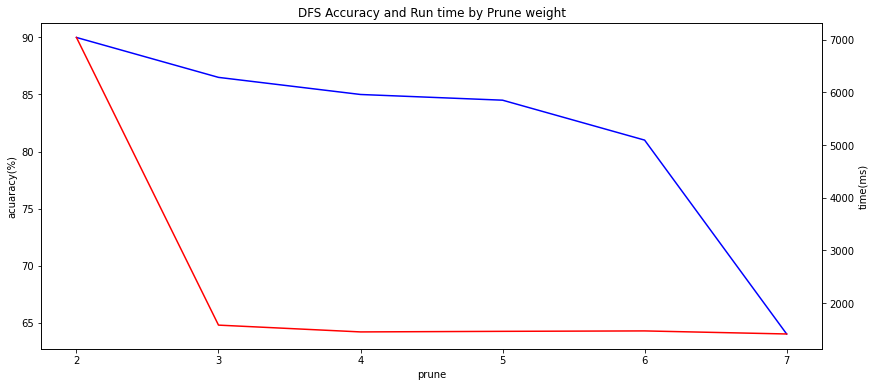

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(dfs_prunes, dfs_accuracies, color="b")
ax.set_xlabel("prune")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(dfs_prunes, dfs_times, color="r")
ax2.set_ylabel("time(ms)")

plt.title('DFS Accuracy and Run time by Prune weight')
plt.show()

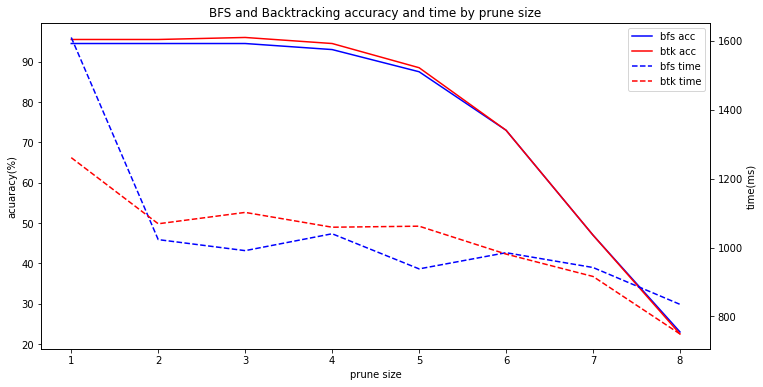

In [ ]:
fig,ax = plt.subplots(figsize=(12, 6))
ax.plot(bfs_prunes, bfs_accuracies, color="b", label='bfs acc')

ax2=ax.twinx()
ax2.plot(bfs_prunes, bfs_times, '--', color="b", label='bfs time')

ax.plot(dfs_prunes, dfs_accuracies, color="r", label='btk acc')

ax2.plot(dfs_prunes, dfs_times, '--', color="r", label='btk time')

ax.set_xlabel("prune size")
ax.set_ylabel("acuaracy(%)")
ax2.set_ylabel("time(ms)")
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)

plt.title('BFS and Backtracking accuracy and time by prune size')

plt.show()

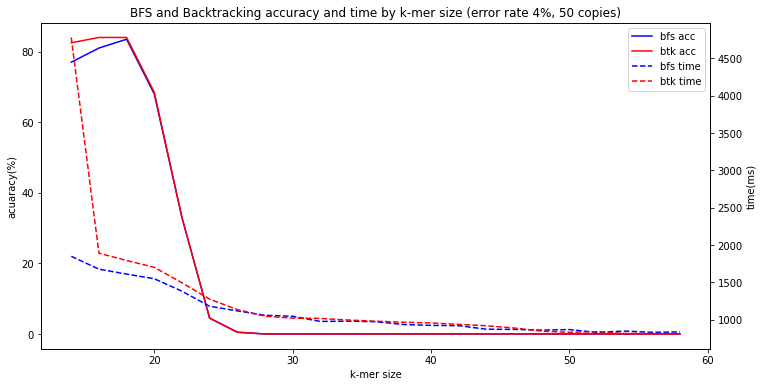

In [ ]:
fig,ax = plt.subplots(figsize=(12, 6))
ax.plot(bfs_kmer_sizes, bfs_accuracies, color="b", label='bfs acc')

ax2=ax.twinx()
ax2.plot(bfs_kmer_sizes, bfs_times, '--', color="b", label='bfs time')

ax.plot(dfs_kmer_sizes, dfs_accuracies, color="r", label='btk acc')

ax2.plot(dfs_kmer_sizes, dfs_times, '--', color="r", label='btk time')

ax.set_xlabel("k-mer size")
ax.set_ylabel("acuaracy(%)")
ax2.set_ylabel("time(ms)")
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)

plt.title('BFS and Backtracking accuracy and time by k-mer size (error rate 4%, 50 copies)')

plt.show()

## Beam

In [ ]:
init_k = 20
prune = 6
kmer_size = 12
beam_k_sizes = []
beam_accuracies = []
beam_times = []
for k in range(init_k, 300, 5):
    # kmer_size = 50
    total_time = 0
    bfs_results = []
    print(f'kmer_size: {kmer_size} k: {k}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(Beam(k=k, db=0))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        bfs_results.append(rs[0])
        if i%10 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(bfs_results).sum()*100/(i+1), 4)}%')
    beam_k_sizes.append(k)
    beam_accuracies.append(round(np.array(bfs_results).sum()*100/origins.shape[0], 4))
    beam_times.append(total_time*1000)


kmer_size: 12 k: 20
0: 0.054s 0.054s 0.0%
10: 0.045s 0.456s 27.2727%
20: 0.023s 0.833s 19.0476%
30: 0.016s 1.19s 22.5806%
40: 0.039s 1.816s 17.0732%
50: 0.025s 2.196s 17.6471%
60: 0.022s 2.673s 14.7541%
70: 0.033s 3.36s 14.0845%
80: 0.044s 3.831s 14.8148%
90: 0.057s 4.307s 16.4835%
100: 0.039s 4.752s 14.8515%
110: 0.027s 5.145s 14.4144%
120: 0.119s 5.58s 13.2231%
130: 0.11s 6.553s 14.5038%
140: 0.119s 7.216s 16.3121%
150: 0.035s 7.678s 15.894%
160: 0.046s 8.125s 15.528%
170: 0.026s 8.482s 15.7895%
180: 0.08s 8.879s 15.4696%
190: 0.019s 9.307s 14.6597%
kmer_size: 12 k: 25
0: 0.07s 0.07s 0.0%
10: 0.07s 0.744s 36.3636%
20: 0.034s 1.394s 23.8095%
30: 0.02s 1.878s 25.8065%
40: 0.049s 2.292s 21.9512%
50: 0.043s 2.886s 23.5294%
60: 0.019s 3.292s 19.6721%
70: 0.059s 3.774s 19.7183%
80: 0.047s 4.288s 19.7531%
90: 0.041s 4.838s 20.8791%
100: 0.05s 5.258s 18.8119%
110: 0.021s 5.679s 18.018%
120: 0.054s 6.062s 16.5289%
130: 0.077s 6.626s 16.7939%
140: 0.068s 7.18s 18.4397%
150: 0.059s 7.673s 17.88

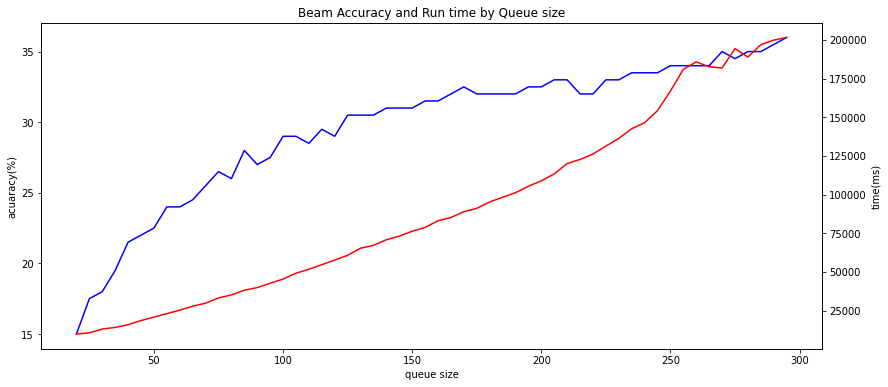

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(beam_k_sizes, beam_accuracies, color="b")
ax.set_xlabel("queue size")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(beam_k_sizes, beam_times, color="r")
ax2.set_ylabel("time(ms)")

plt.title('Beam Accuracy and Run time by Queue size')
plt.show()

In [ ]:
k = 300
prune = 1
init_kmer_size = 12
beam_kmer_sizes = []
beam_accuracies = []
beam_times = []
for kmer_size in range(init_kmer_size, 30, 2):
    # kmer_size = 50
    # total_time = 0
    # beam_results = []
    # print(f'kmer_size: {kmer_size} k: {k}')
    # for i, original in enumerate(origins):
    #     decoder = Decoder(origin=original, prune=prune)
    #     decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
    #     start = time.time()
    #     rs = decoder.decode(Beam(k=k, db=0))
    #     ttt = time.time() - start
    #     total_time += round(ttt, 3)
    #     beam_results.append(rs[0])
    #     if i%10 == 0:
    #         print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(beam_results).sum()*100/(i+1), 4)}%')
    beam_kmer_sizes.append(kmer_size)
    # beam_accuracies.append(round(np.array(beam_results).sum()*100/origins.shape[0], 4))
    # beam_times.append(total_time*1000)

In [ ]:
k = 300
prune = 1
init_kmer_size = 12
beam_kmer_sizes = []
beam_accuracies = []
beam_times = []
for kmer_size in range(init_kmer_size, 30, 2):
    # kmer_size = 50
    total_time = 0
    beam_results = []
    print(f'kmer_size: {kmer_size} k: {k}')
    for i, original in enumerate(origins):
        decoder = Decoder(origin=original, prune=prune)
        decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
        start = time.time()
        rs = decoder.decode(Beam(k=k, db=0))
        ttt = time.time() - start
        total_time += round(ttt, 3)
        beam_results.append(rs[0])
        if i%10 == 0:
            print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(beam_results).sum()*100/(i+1), 4)}%')
    beam_kmer_sizes.append(k)
    beam_accuracies.append(round(np.array(beam_results).sum()*100/origins.shape[0], 4))
    beam_times.append(total_time*1000)

kmer_size: 12 k: 300
0: 2.652s 2.652s 0.0%
10: 0.874s 12.228s 45.4545%
20: 0.776s 22.054s 33.3333%
30: 1.744s 33.416s 35.4839%
40: 1.159s 43.962s 31.7073%
50: 1.059s 54.793s 35.2941%
60: 0.955s 65.549s 32.7869%
70: 1.038s 77.384s 32.3944%
80: 0.618s 87.317s 33.3333%
90: 1.227s 98.475s 34.0659%
100: 0.815s 107.952s 33.6634%
110: 1.507s 118.353s 32.4324%
120: 1.015s 130.81s 34.7107%
130: 1.001s 141.793s 36.6412%
140: 1.537s 151.248s 36.8794%
150: 1.236s 160.881s 36.4238%
160: 1.052s 170.115s 36.0248%
170: 1.099s 179.315s 36.2573%
180: 1.428s 189.743s 35.3591%
190: 0.414s 199.204s 35.6021%
kmer_size: 14 k: 300
0: 0.831s 0.831s 0.0%
10: 1.062s 11.507s 54.5455%
20: 0.595s 20.037s 38.0952%
30: 0.436s 30.179s 51.6129%
40: 1.187s 40.213s 46.3415%
50: 1.116s 50.478s 50.9804%
60: 0.376s 60.082s 50.8197%
70: 0.412s 68.37s 47.8873%
80: 0.621s 77.506s 48.1481%
90: 1.265s 88.637s 48.3516%
100: 1.242s 97.265s 46.5347%
110: 1.103s 107.593s 45.9459%
120: 1.084s 118.343s 48.7603%
130: 1.142s 128.261s 49

In [ ]:
beam_kmer_sizes

[12, 14, 16, 18, 20, 22, 24, 26, 28]

In [ ]:
beam_accuracies = [35.6021, 51.8325, 57.5916, 57.0681, 54.4503, 42.4084, 25.1309, 13.089, 4.1885]
beam_times = [199204, 189009, 178288, 173001, 169771, 163872, 161526, 154314, 143958]

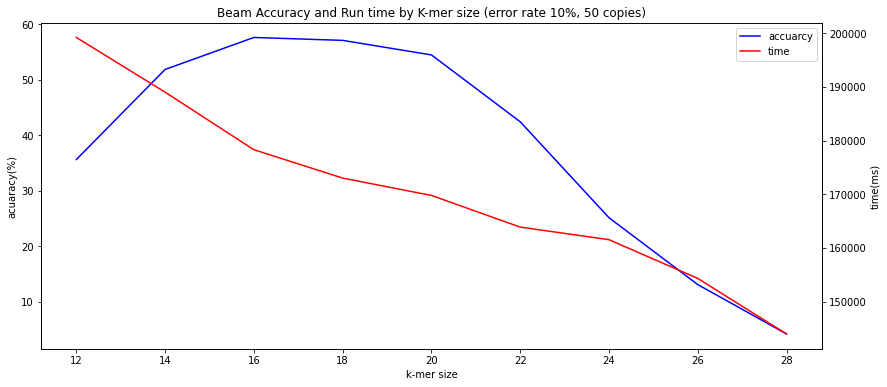

In [ ]:
fig,ax = plt.subplots(figsize=(14, 6))
ax.plot(beam_kmer_sizes, beam_accuracies, color="b", label="accuarcy")
ax.set_xlabel("k-mer size")
ax.set_ylabel("acuaracy(%)")

ax2=ax.twinx()
ax2.plot(beam_kmer_sizes, beam_times, color="r", label="time")
ax2.set_ylabel("time(ms)")

plt.title('Beam Accuracy and Run time by K-mer size (error rate 10%, 50 copies)')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)
plt.show()

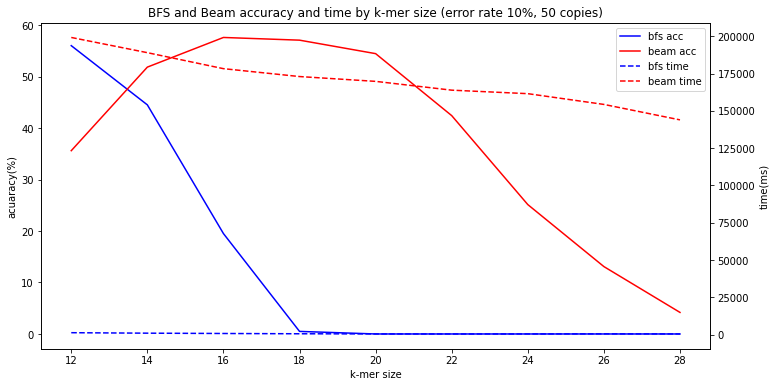

In [ ]:
fig,ax = plt.subplots(figsize=(12, 6))
ax.plot(bfs_kmer_sizes, bfs_accuracies, color="b", label='bfs acc')

ax2=ax.twinx()
ax2.plot(bfs_kmer_sizes, bfs_times, '--', color="b", label='bfs time')

ax.plot(beam_kmer_sizes, beam_accuracies, color="r", label='beam acc')

ax2.plot(beam_kmer_sizes, beam_times, '--', color="r", label='beam time')

ax.set_xlabel("k-mer size")
ax.set_ylabel("acuaracy(%)")
ax2.set_ylabel("time(ms)")
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)

plt.title('BFS and Beam accuracy and time by k-mer size (error rate 10%, 50 copies)')

plt.show()

Text(0.5, 1.0, 'Beam Accuracy by Queue size')

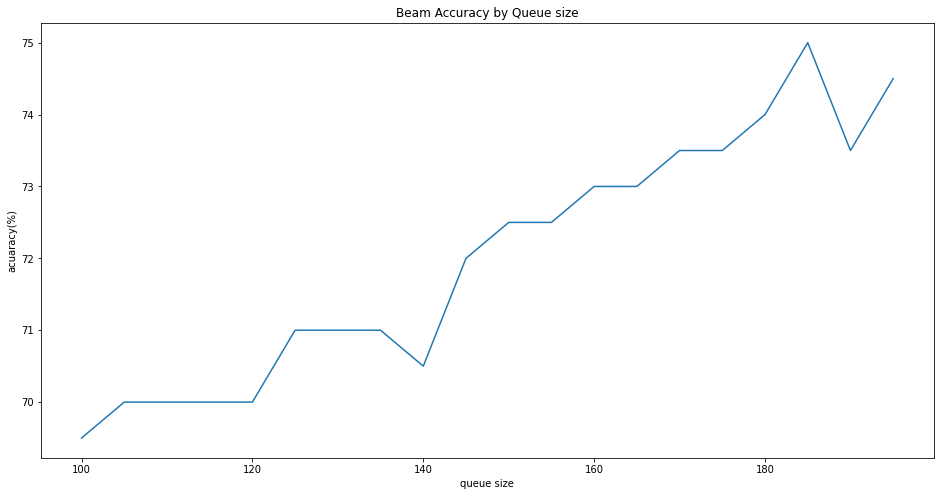

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(beam_k_sizes, beam_accuracies)
plt.xlabel('queue size')
plt.ylabel('acuaracy(%)')
plt.title('Beam Accuracy by Queue size')
